In [26]:
import os
import PIL.Image as Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

In [27]:
def load_images_from_folder(folder_path):
  train_images = []
  train_labels = []
  test_images = []
  test_labels = []
  # at the first iteration want it to catch the train data, and then the test ones at the second
  for iteration, subfolder_1 in enumerate(os.listdir(folder_path)): # train, test
    print(f"Loading from {subfolder_1}:")
    subfolder_1_path = os.path.join(folder_path, subfolder_1)
    for label, subfolder_2 in enumerate(os.listdir(subfolder_1_path)): # ants, bees
      print(f"At iteration {iteration} - {subfolder_1}, {subfolder_2}")
      subfolder_2_path = os.path.join(subfolder_1_path, subfolder_2) 
      for file in os.listdir(subfolder_2_path):
        image_path = os.path.join(subfolder_2_path, file)
        try:
          image = Image.open(image_path).convert('RGB').resize((100, 100))
          image = np.array(image)
          if iteration == 0:
            train_images.append(image)
            train_labels.append(label)
          else:
            test_images.append(image)
            test_labels.append(label)
        except Exception as e:
          print(f"Error loading image {image_path}: {e}")
  return (np.array(train_images), np.array(train_labels)), (np.array(test_images), np.array(test_labels))

In [28]:
# load the images data using the built function
image_path = r'C:\Users\Houcine DG\OneDrive\Bureau\Master Data Science\s3\deep learning medical - Afdel\hymenoptera_data'
(train_images, train_labels), (test_images, test_labels) = load_images_from_folder(image_path)

Loading from train:
At iteration 0 - train, ants
At iteration 0 - train, bees
Loading from val:
At iteration 1 - val, ants
At iteration 1 - val, bees


In [29]:
# print data shapes
print(f"train_images shape: {train_images.shape}, train_labels shape: {train_labels.shape}")
print(f"test_images shape: {test_images.shape}, test_labels shape: {test_labels.shape}")

train_images shape: (245, 100, 100, 3), train_labels shape: (245,)
test_images shape: (153, 100, 100, 3), test_labels shape: (153,)


Text(0.5, 1.0, '0')

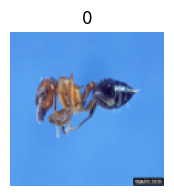

In [30]:
# show the first traing image and its label
plt.figure(figsize=(2, 2))
plt.axis('off')
plt.imshow(train_images[0])
plt.title(train_labels[0])

In [31]:
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout

input_shape = (100, 100, 3)
model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(7, 7), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(5, 5)))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

c:\Pipeline_development\python312_venv_ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(
  loss=tensorflow.keras.losses.CategoricalCrossentropy(),
  optimizer=tensorflow.keras.optimizers.Adam(),
  metrics=['accuracy'])

In [34]:
history = model.fit(train_images, train_labels_one_hot, batch_size=5, epochs=10, validation_data=(test_images, test_labels_one_hot), shuffle=True)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.3958 - loss: 135.0205 - val_accuracy: 0.5425 - val_loss: 0.7740
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6548 - loss: 0.6189 - val_accuracy: 0.4967 - val_loss: 0.8031
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.7365 - loss: 0.4860 - val_accuracy: 0.5752 - val_loss: 0.8133
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.8164 - loss: 0.3926 - val_accuracy: 0.5752 - val_loss: 0.9347
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8708 - loss: 0.3274 - val_accuracy: 0.4967 - val_loss: 1.1122
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.8668 - loss: 0.2566 - val_accuracy: 0.4902 - val_loss: 1.1317
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.7680 - loss: 0.4378 - val_accuracy: 0.5098 - val_loss: 1.1782
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.8054 - loss: 0.3744 - val_accuracy: 0.5490 -

Text(0.5, 1.0, 'training accuracy Vs. validation accuracy ')

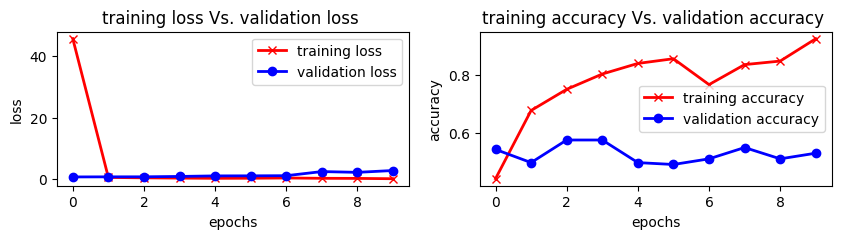

In [35]:
# training curves
# training loss Vs. validation loss 
plt.figure(figsize=(10, 2))
plt.subplot(1, 2, 1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'], marker='x', color='red', linewidth=2)
plt.plot(history.history['val_loss'], marker='o', color='blue', linewidth=2)
plt.legend(['training loss', 'validation loss'])
plt.title('training loss Vs. validation loss ')
# accuracy
plt.subplot(1, 2, 2)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], marker='x', color='red', linewidth=2)
plt.plot(history.history['val_accuracy'], marker='o', color='blue', linewidth=2)
plt.legend(['training accuracy', 'validation accuracy'])
plt.title('training accuracy Vs. validation accuracy ')

In [38]:
loss, accuracy = model.evaluate(test_images, test_labels_one_hot)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5944 - loss: 2.5078


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


(-0.5, 99.5, 99.5, -0.5)

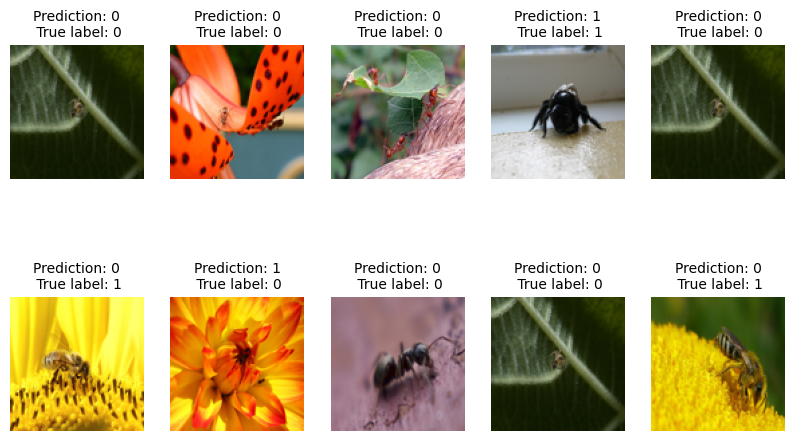

In [42]:
# let's make some predictions
plt.figure(figsize=(10, 6))
for i in range(10):
  rand_index = np.random.randint(len(test_images))
  image_as_batch = test_images[rand_index].reshape(1, 100, 100, 3)
  prediction = np.argmax(model.predict(test_images[[rand_index]]))
  plt.subplot(2, 5, i + 1)
  plt.imshow(test_images[rand_index])
  plt.title(f"Prediction: {prediction}\n True label: {test_labels[rand_index]}", fontsize=10)
  plt.axis('off')
plt.axis('off')
# plt.tight_layout()

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = np.argmax(model.predict(test_images), axis=1)
print(classification_report(test_labels, predictions))
print(confusion_matrix(test_labels, predictions))
# it's not actually a perfect model since the data lackage!  

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
              precision    recall  f1-score   support

           0       0.49      0.67      0.57        70
           1       0.60      0.41      0.49        83

    accuracy                           0.53       153
   macro avg       0.54      0.54      0.53       153
weighted avg       0.55      0.53      0.52       153

[[47 23]
 [49 34]]
